# $F(R)$ example

In [1]:
import pytearcat as pt
import sympy as sp

In [2]:
t,x,y,z = pt.coords('t,x,y,z')
A = pt.fun('A','t')
B = pt.fun('B','t')
g = pt.metric('ds2 = dt**2 - (A**2*dx**2 + B**2*dy**2 + B**2*dz**2)')
# I am Taking Example of Spatially Homogeneous and Anisotropic LRS Bianchi Type:-1 Universe

Remember that the time coordinate must be the first coordinate.

Dimension = 4
Coordinates = t,x,y,z
Metric defined successfully: 



<IPython.core.display.Math object>

Matrix([
[1,        0,        0,        0],
[0, -A(t)**2,        0,        0],
[0,        0, -B(t)**2,        0],
[0,        0,        0, -B(t)**2]])

In [3]:
Chr = pt.christoffel()
Chr.display("^,_,_")
# For F(R) Theory of Gravity First we Define Non Zero Christoffel Symbol 

<IPython.core.display.Latex object>

  0%|          | 0/64 [00:00<?, ?it/s]

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

  0%|          | 0/256 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

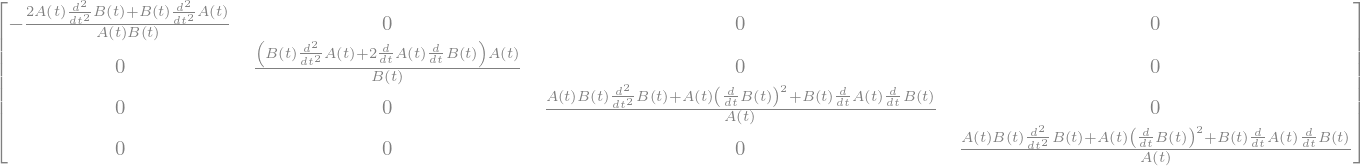

<IPython.core.display.Math object>

In [4]:
Ric = pt.ricci()
RicS = pt.riccis()
Ric.display()
pt.display(RicS)

In [5]:
Ric.complete('_,_')

Ricci Tensor $R{^\alpha}{_\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

Ricci Tensor $R{^\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

Ricci Tensor $R{_\alpha}{^\beta}$:   0%|          | 0/16 [00:00<?, ?it/s]

<IPython.core.display.Latex object>

In [6]:
Ric.display('_,_',aslist=True)  # the _,_ components are well defined (they are not nans)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

The Ricci Scalar is a function of $t$, ONLY OF $t$! 
Then we can simplify everything saying that is a function of $R$, which is a function of $t$.

In [7]:
# we have to do the following:
R = sp.Function('R')(t) #ricci scalar as a function of t
F = sp.Function('F')(R) #F is function of R, f != F
f = sp.Function('f')(R) #f is function of R, f != F

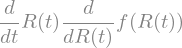

In [8]:
#e.g.: if we derivate f with respect to t naturally sympy generates the chain rule as an output:
sp.diff(f,t)

In [29]:
# now we define the left hand side (LHS) of the field equation as follows:
LHS = pt.ten('LHS',2)

DALAMBERT = g('^i,^j')*pt.C(pt.C(F,'_j'),'_i')

LHS.assign(F*Ric('_i,_j') - sp.Rational(1,2)*f*g('_i,_j')-pt.C(pt.C(F,'_j'),'_i')+g('_i,_j')*DALAMBERT,'_i,_j')

LHS.simplify()

LHS.display("_,_",aslist=True)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [32]:
# note: if you want to display only the Dalambert of F, then you can display only this part:

DALAMBERT.simplify()

                                                           d          d       
                 2            2                      2   2⋅──(B(t))⋅─────(F(R(
  d             d            d             ⎛d       ⎞      dt       dR(t)     
─────(F(R(t)))⋅───(R(t)) + ──────(F(R(t)))⋅⎜──(R(t))⎟  + ─────────────────────
dR(t)            2              2          ⎝dt      ⎠                   B(t)  
               dt          dR(t)                                              

     d          d          d            d       
t)))⋅──(R(t))   ──(A(t))⋅─────(F(R(t)))⋅──(R(t))
     dt         dt       dR(t)          dt      
───────────── + ────────────────────────────────
                              A(t)              
                                                

In [42]:
# if you want to show the LHS of C(C(F,_i),_j), then you can define a tensor as you want, e.g.:

LHSwanted = pt.ten('LHSwanted', 2)
LHSwanted.assign(pt.C(pt.C(F,'_j'),'_i'),'_i,_j')
LHSwanted.display('_,_',aslist= True)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>